In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random
from scipy.stats import norm
from tqdm.auto import tqdm

In [233]:
data = pd.read_csv('ba2.csv')

In [234]:
# for i in data.columns:
#     if len(data[i].unique()) > 4:
#         print(f'"{i}",')

In [235]:
TARGET = 'Тяжесть'

In [236]:
data[TARGET].unique()

array([3, 2], dtype=int64)

In [237]:
name_group_all = {
    'Тяжесть' : ['БАТТ', 'БАСТ'],
    'SNP_rs896' : ['TT', 'TC', 'CC']
}

In [238]:
name_group_all

{'Тяжесть': ['БАТТ', 'БАСТ'], 'SNP_rs896': ['TT', 'TC', 'CC']}

In [239]:
name_group_all[TARGET]

['БАТТ', 'БАСТ']

In [240]:
#обозначение групп

name_group = name_group_all[TARGET]
#spisok_group
data = data.dropna(subset=[TARGET])
data = data.astype({TARGET: np.int32})
#обозначение групп

In [241]:
data[TARGET].unique()

array([3, 2])

In [242]:
#data['Тяжесть'].sum()

In [243]:
#for i in range(len(data['Тяжесть'])):
#    if data.loc[i,'Тяжесть'] == 2:
#        data.loc[i,'Тяжесть'] = 1
#    elif data.loc[i,'Тяжесть'] == 3:
#        data.loc[i,'Тяжесть'] = 0
        

In [324]:
#необходимо обозначить какие переменные к какой группе относятся
scale = [
'Приступов_удушья_в_день',
'Обострений_в_год',
'Длительность_БА_на_момент_исслед',
'САД',
'ДАД',
'ЧД',
'ЧСС',
'Пульс',
'Сатурация_при_поступлении',
'Сатурация_при_выписке',
'Лейкоциты_при_поступлении',
'Эритроциты_при_постпулении',
'Гемоглобин_при_поступлении',
'Тромбоциты_при_поступлении',
'Сегментоядерные_при_поступлении',
'Эозинофилы_при_поступлении',
'Моноциты_при_поступлении',
'Лимфоциты_при_поступлении',
'СОЭ_при_поступлении',
'Лейкоциты_при_выписке',
'Эритроциты_при_выписке',
'Гемоглобин_при_выписке',
'Тромбоциты_при_выписке',
'Сегментоядерные_при_выписке',
'Лимфоциты_при_выписке',
'СОЭ_при_выписке',
'БАК_посев_мокроты',
'IgE_общий',
'FeF25_при_поступлении',
'FeF50_при_поступлении',
'FeF75_при_поступлении',
'FeF25_при_выписке',
'FeF50_при_выписке',
'FeF75_при_выписке',
'ЧСС_ЭКГ',
'Общий_билирубин',
'Глюкоза_крови',
'Общий_белок',
'Холестерин',
'Возраст2',
'Рост',
'Вес',
'обострений_за_последний_год',
'ACQ_контроль_симптомов_БА',
'Самочувствие',
'Активность',
'Настроение',
'Экстраверсия_интроверсия',
'Ригидность_пластичность',
'Эмоционвозбудим_уравновешенность',
'Быстрота_реакц_медлительность',
'Активность_пасивность',
'Искренность',
'Реактивная_тревожность',
'Ситуатвиная_тревожность',
'Физическая_активность_PF',
'Физичпроблемы_в_жизнедеят_RP',
'Интенсивность_боли_BP',
'Общее_здоровье_GH',
'Жизненная_актвиность_VT',
'Социальная_активность_SF',
'Эмоционал_проблемы_в_жизнедеят_RE',
'Психическое_здоровье_MH',
'Физич_компонент_здор_PH',
'Психич_компонент_здор_MH',
'Наличие_вегет_дисфун',
'Наличие_вегет_дисфун2',
'Апатия1',
'Апатия2',
'Уровень_VIP',
'Уровень_SP',
'ЖЕЛ_при_поступлении',
'ОФВ1_при_поступлении',
'Индекс_Тиффно_при_поступлении',
'ЖЕЛ_при_выписке',
'ОФВ1_при_выписке',
'Индекс_Тиффно_при_выписке',
'ИМТ',
'VAR_mc',
'aVNN_mc',
'SDNN_mc',
'pNN50',
'rMSSD',
'SDNNidx_mc',
'SDANN_mc',
'VLF',
'LF_Симпатика',
'HF_Парасимпатика',
'nHF',
'CBBP',
'LF_HF',
]
categorial = [
#  "Сезон_обострения_БА",
#  "Худшее_время_суток_по_БА",
#  "Ухудшение_состояния_в_отпуске",
#  "Заболевания_ЖКТ",

# "Терапия_БА",
# "Форма",
# "Тяжесть",
# "Оценка_соц_бытовых_условий",
# "ДН",
# "Эмфизема",
# "ХЛС",
# "Пневмосклероз",
# "Гормонозависимость",
# "Проживание",
# "Профессиональное_заболевание",
# "ГБ",
# "ИБС",
# "ГЭРБ",
# "Наличие_суносовой_аритмии",
# "Наличие_гипертрофии_ЛЖ",
# "Эозинофилы_в_мокроте",
# "Пол",
# "Наличие_работы",
# "Работа_в_ночную_смену",
# "Профессиональый_контакт",
# "Образование",
# "Наличие_аллергической_реакции",
# "Аллерг_реакция_у_родственников",
# "Наличие_заболевания_ЖКТ",
# "Наличие_заболевания_ЛОРорганов",
# "Наличие_грибковых_заболеваний",
# "Ухудшение_состояния_при_физнагруз",
# "Ухудшение_состояния_во_время_еды",
# "Влияние_менструальногоцикла_на_БА",
# "Наличие_ОтёкаКвинке_в_анамнезе",
# "Наличие_стресса",
# "Наличие_других_заболеваний",
"SNP_rs896",
"SNP_rs2072100",
"SNP_rs3771829",
"SNP_rs3823082",
#  "Фенотип",
# "Коридор",
#  "Симпатика",
]


In [325]:
spisok_group = categorial

In [326]:
def plot_bar(data, data_vr, i , name_group_all):
    plt.figure(figsize=(10,6))
    # ширина полос
    barWidth = 0.3

    # высота 1 ряда
    bars1 = [data_vr[j,1] for j in range(len(data_vr[:,0])-1)]
    # высота 2 ряда
    bars2 = [data_vr[j,3] for j in range(len(data_vr[:,0])-1)]
    bars3 = bars1 + bars2
    
    # The x position of bars
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    try:
        name = name_group_all[TARGET]
    except: 
        name = data[TARGET].unique()

    # Create blue bars
    ax = plt.bar(r1, bars1, width = barWidth, color = '#48507E', edgecolor = 'black', label=name[0])

    # Create cyan bars
    ax = plt.bar(r2, bars2, width = barWidth, color = '#A6CFD6', edgecolor = 'black', label=name[1])

    # general layout
    try:
        name = []
        name2 = name_group_all[i]
        for j in range(len(name2)):
            name.append(name2[j])
        
        name.append(name2[0][0])
        name.append(name2[0][1])
    
    except: 
        if len(data_vr) == 6:
            name = [1,2,3,'Всего:',1,2,'Всего:']
        elif len(data_vr) == 5:
            name = [1,2,'Всего:',1,2,'Всего:']
        name = [1,2,3,1,2]

    # Create labels
    # высота 1 ряда
    pr1 = [data_vr[j,1] for j in range(len(data_vr[:,0])-1)]
    pr2 = [data_vr[j,3] for j in range(len(data_vr[:,0])-1)]
    pr3 = pr1 + pr2
    label = [f'{pr3[j]:.1f}%' for j in range(len(pr3))]

    if len(pr3) == 4:
        r3 = [-0.1,0.9,0.2,1.2]
    elif len(pr3) == 6:
        r3 = [-0.1,0.9,1.9,0.2,1.2, 2.2]
    elif len(pr3) == 8:
        r3 = [-0.1,0.9,1.9,2.9, 0.2,1.2, 2.2,3.2]
    elif len(pr3) == 10:
        r3 = [-0.1,0.9,1.9,2.9, 3.9, 0.2,1.2, 2.2,3.2, 4.2]
    elif len(pr3) == 12:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9, 0.2,1.2, 2.2,3.2, 4.2,5.2]
    elif len(pr3) == 14:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9,5.9, 0.2,1.2, 2.2,3.2, 4.2,5.2,6.2]
    elif len(pr3) == 16:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9,5.9,6.9, 0.2,1.2, 2.2,3.2, 4.2,5.2,6.2,7.2]
    # Text on the top of each bar
    for i in range(0,5):
        plt.text(x = r3[i]-0.2 , y = bars3[i]+0.35, s = label[i], size = 14)
    for i in range(5,10):
        plt.text(x = r3[i] , y = bars3[i]+0.35, s = label[i], size = 14)
    
    plt.xticks([r + barWidth - 0.15 for r in range(len(bars1))], name, size = 14)
    plt.yticks(size = 12)
    plt.ylabel('Частота (%)', size = 14)
    plt.legend(fontsize = 12)
    plt.subplots_adjust(bottom= 0.2, top = 1)
    # Show graphic
    plt.show()

In [327]:
def test_fishera(data, i , name_group_all):
    data = data.dropna(subset=[i])
    data = data.astype({i: np.int32})
    n_ind = 4
    
    data_vr = np.zeros((n_ind+3, 12))
    col_ch = 0
    if len(data[i].unique()) == 3:
        for col in data[TARGET].unique():
            vsego = 0
            ind_ch = 0
            for ind in sorted(data[i].unique()):
                data_vr[ind_ch, col_ch] = data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
                vsego += data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
                ind_ch += 1
            data_vr[len(data[i].unique()),col_ch] = vsego
            col_ch += 1
    elif len(data[i].unique()) == 2: 
        for col in data[TARGET].unique():
            vsego = 0
            ind_ch = 0
            for ind in [0,1,2]:
                data_vr[ind_ch, col_ch] = data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
                vsego += data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
                ind_ch += 1
            data_vr[3,col_ch] = vsego
            col_ch += 1
        
    
    
    data_vr[n_ind-1,2] = data_vr[n_ind-1,1]
    data_fisher = np.zeros((2,2))   
    #генотип 1 начало
    data_fisher[0,0] = data_vr[0,0]
    data_fisher[0,1] = data_vr[0,1]
    data_fisher[1,0] = data_vr[n_ind-1,0] - data_vr[0,0]
    data_fisher[1,1] = data_vr[n_ind-1,1] - data_vr[0,1]
     
    data_vr[0,2] = data_fisher[0,1]
    #проценты
    data_vr[0,1] = round(data_fisher[0,0] / data_vr[n_ind-1,0] * 100, 2)
    data_vr[0,3] = round(data_fisher[0,1] / data_vr[n_ind-1,2] * 100, 2)
    #хи квадрат
    try:
        hi2 = st.chi2_contingency(data_fisher)
    except:
        hi2 = [0,1]
    data_vr[0,4] = round(hi2[0], 2)
    data_vr[0,5] = round(hi2[1], 3)
    #Фишер
    _, pfisher = st.fisher_exact(data_fisher)
    data_vr[0,6] = round(pfisher, 2)
     
    #Фишера-Бошло
    fisher_boschloo = st.boschloo_exact(data_fisher)
    data_vr[0,7] = round(fisher_boschloo.statistic, 2)
    data_vr[0,8] = round(fisher_boschloo.pvalue, 7)
        
    data_vr[0,9] = round((data_fisher[0,0] * data_fisher[1,1]) /
                         (data_fisher[0,1] * data_fisher[1,0]),2)
    data_vr[0,10] = round(math.exp(math.log(data_vr[0,9]+0.00001) 
                         - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    data_vr[0,11] = round(math.exp(math.log(data_vr[0,9]+0.00001)
                         +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    
    #генотип 1 конец
    
    
    #генотип 2 начало
    data_fisher[0,0] = data_vr[1,0]
    data_fisher[0,1] = data_vr[1,1]
    data_fisher[1,0] = data_vr[n_ind-1,0] - data_vr[1,0]
    data_fisher[1,1] = data_vr[n_ind-1,1] - data_vr[1,1]
     
    data_vr[1,2] = data_fisher[0,1]
    #проценты
    data_vr[1,1] = round(data_fisher[0,0] / data_vr[n_ind-1,0] * 100, 2)
    data_vr[1,3] = round(data_fisher[0,1] / data_vr[n_ind-1,2] * 100, 2)
    #хи квадрат
    try:
        hi2 = st.chi2_contingency(data_fisher)
    except:
        hi2 = [0,1]
    data_vr[1,4] = round(hi2[0], 2)
    data_vr[1,5] = round(hi2[1], 3)
    #Фишер
    _, pfisher = st.fisher_exact(data_fisher)
    data_vr[1,6] = round(pfisher, 2)
     
    #Фишера-Бошло
    fisher_boschloo = st.boschloo_exact(data_fisher)
    data_vr[1,7] = round(fisher_boschloo.statistic, 2)
    data_vr[1,8] = round(fisher_boschloo.pvalue, 7)
        
    data_vr[1,9] = round((data_fisher[0,0] * data_fisher[1,1]) /
                         (data_fisher[0,1] * data_fisher[1,0]),2)
    data_vr[1,10] = round(math.exp(math.log(data_vr[1,9]+0.00001) 
                         - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    data_vr[1,11] = round(math.exp(math.log(data_vr[1,9]+0.00001)
                         +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    
    #генотип 2 конец
    
    #генотип 3 начало
    data_fisher[0,0] = data_vr[2,0]
    data_fisher[0,1] = data_vr[2,1]
    data_fisher[1,0] = data_vr[n_ind-1,0] - data_vr[2,0]
    data_fisher[1,1] = data_vr[n_ind-1,1] - data_vr[2,1]
     
    data_vr[2,2] = data_fisher[0,1]
    #проценты
    data_vr[2,1] = round(data_fisher[0,0] / data_vr[n_ind-1,0] * 100, 2)
    data_vr[2,3] = round(data_fisher[0,1] / data_vr[n_ind-1,2] * 100, 2)
    #хи квадрат
    try:
        hi2 = st.chi2_contingency(data_fisher)
    except:
        hi2 = [0,1]
    data_vr[2,4] = round(hi2[0], 2)
    data_vr[2,5] = round(hi2[1], 3)
    #Фишер
    _, pfisher = st.fisher_exact(data_fisher)
    data_vr[2,6] = round(pfisher, 2)
     
    #Фишера-Бошло
    fisher_boschloo = st.boschloo_exact(data_fisher)
    data_vr[2,7] = round(fisher_boschloo.statistic, 2)
    data_vr[2,8] = round(fisher_boschloo.pvalue, 7)
        
    data_vr[2,9] = round((data_fisher[0,0] * data_fisher[1,1]) /
                         (data_fisher[0,1] * data_fisher[1,0]),2)

    data_vr[2,10] = round(math.exp(math.log(data_vr[2,9]+0.00001) 
                         - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    data_vr[2,11] = round(math.exp(math.log(data_vr[2,9]+0.00001)
                         +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    
    #генотип 3 конец
    
    
    
    
    
    #сумма генотипов
    data_vr[n_ind-1,1] = 100
    data_vr[n_ind-1,3] = 100

    #считаем аллели
    data_vr[n_ind,0] = data_vr [0,0] * 2 + data_vr [1,0] 
    data_vr[n_ind,2] = data_vr [0,2] * 2 + data_vr [1,2]  

    if n_ind == 4:
        data_vr[n_ind+1,0] = data_vr [2,0] * 2 + data_vr [1,0] 
        data_vr[n_ind+1,2] = data_vr [2,2] * 2 + data_vr [1,2]
    elif n_ind == 3:
        data_vr[n_ind+1,0] = data_vr [1,0] 
        data_vr[n_ind+1,2] = data_vr [1,2]
    
    data_vr[n_ind,1] = data_vr[n_ind-1,0] / (data_vr[n_ind-1,0]+data_vr[n_ind,0]) * 100
    data_vr[n_ind+1,1] = data_vr[n_ind,0] / (data_vr[n_ind-1,0]+data_vr[n_ind,0]) * 100
    data_vr[n_ind,3] = data_vr[n_ind-1,2] / (data_vr[n_ind-1,2]+data_vr[n_ind,2]) * 100
    data_vr[n_ind+1,3] = data_vr[n_ind,2] / (data_vr[n_ind-1,2]+data_vr[n_ind,2]) * 100
    #сумма аллелей
    data_vr[n_ind+2,0] = (data_vr[n_ind-1,0]+data_vr[n_ind,0])
    data_vr[n_ind+2,2] = (data_vr[n_ind-1,2]+data_vr[n_ind,2])
    data_vr[n_ind+2,1] = 100
    data_vr[n_ind+2,3] = 100

    #первый аллель
    data_fisher[0,0] = data_vr[n_ind-1,0]
    data_fisher[0,1] = data_vr[n_ind-1,2]
    data_fisher[1,0] = data_vr[n_ind,0]
    data_fisher[1,1] = data_vr[n_ind,2]
    #хи квадрат
    try:
        hi2 = st.chi2_contingency(data_fisher)
    except:
        hi2 = [0,1]
    data_vr[n_ind,4] = round(hi2[0], 2)
    data_vr[n_ind,5] = round(hi2[1], 3)
    #Фишер
    _, pfisher = st.fisher_exact(data_fisher)
    data_vr[n_ind,6] = round(pfisher, 2)
    #Фишера-Бошло
    fisher_boschloo = st.boschloo_exact(data_fisher)
    data_vr[n_ind,7] = round(fisher_boschloo.statistic, 2)
    data_vr[n_ind,8] = round(fisher_boschloo.pvalue, 7)
    #отношение шансов
    data_vr[n_ind,9] = round((data_fisher[0,0] * data_fisher[1,1]) /
                             (data_fisher[0,1] * data_fisher[1,0]),2)

    data_vr[n_ind,10] = round(math.exp(math.log(data_vr[n_ind,6]+0.00001) 
                                      - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    data_vr[n_ind,11] = round(math.exp(math.log(data_vr[n_ind,6]+0.00001)
                                               +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    #второй аллель
    data_fisher[0,0] = data_vr[n_ind,0]
    data_fisher[0,1] = data_vr[n_ind,2]
    data_fisher[1,0] = data_vr[n_ind-1,0]
    data_fisher[1,1] = data_vr[n_ind-1,2]
    #хи квадрат
    try:
        hi2 = st.chi2_contingency(data_fisher)
    except:
        hi2 = [0,1]
    data_vr[n_ind+1,4] = round(hi2[0], 2)
    data_vr[n_ind+1,5] = round(hi2[1], 3)
    #Фишер
    _, pfisher = st.fisher_exact(data_fisher)
    data_vr[n_ind+1,6] = round(pfisher, 2)
    #Фишера-Бошло
    fisher_boschloo = st.boschloo_exact(data_fisher)
    data_vr[n_ind+1,7] = round(fisher_boschloo.statistic, 2)
    data_vr[n_ind+1,8] = round(fisher_boschloo.pvalue, 7)
    #отношение шансов
    data_vr[n_ind+1,9] = round((data_fisher[0,0] * data_fisher[1,1]) /
                             (data_fisher[0,1] * data_fisher[1,0]),2)

    data_vr[n_ind+1,10] = round(math.exp(math.log(data_vr[n_ind+1,6]+0.00001) 
                                      - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    data_vr[n_ind+1,11] = round(math.exp(math.log(data_vr[n_ind+1,6]+0.00001)
                                               +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
    
    cl = []

    for j in range(n_ind+3):
        cl.append(f'{data_vr[j,10]} - {data_vr[j,11]}')

    try: name_g = name_group_all[TARGET]    
    except: name_g = data[TARGET].unique()

    df = {f'{name_g[0]} (абс.)': [int(data_vr[j,0]) for j in range(n_ind+3)], 
          f'{name_g[0]} (%)': [data_vr[j,1] for j in range(n_ind+3)],
          f'{name_g[1]} (абс.)' : [int(data_vr[j,2]) for j in range(n_ind+3)], 
          f'{name_g[1]} (%)': [data_vr[j,3] for j in range(n_ind+3)],
          'χ2': [data_vr[j,4] for j in range(n_ind+3)],
          'p (χ2)': [data_vr[j,5] for j in range(n_ind+3)],
          'p (fishe)': [data_vr[j,6] for j in range(n_ind+3)],
          'FB': [data_vr[j,7] for j in range(n_ind+3)],
          'p (boschloo)': [data_vr[j,8] for j in range(n_ind+3)],
          'OR': [data_vr[j,9] for j in range(n_ind+3)],
          'CI - 95%': [cl[j] for j in range(n_ind+3)],

          } 

    df = pd.DataFrame(df)

    df.loc[n_ind-1, 'χ2' : 'CI - 95%'] = ''
    df.loc[n_ind+2, 'χ2' : 'CI - 95%'] = ''
      
    try:
        name = []
        name2 = name_group_all[i]
        for j in range(len(name2)):
            name.append(name2[j])            
        name.append('Всего:')
        name.append(name2[0][0])
        name.append(name2[1][1])
        name.append('Всего:')
        df.index = name
    except: 
        if n_ind == 4:
            name = [1,2,3,'Всего:',1,2,'Всего:']
        elif n_ind == 3:
            name = [1,2,'Всего:',1,2,'Всего:']
        df.index = name
        
    data_vr = np.delete(data_vr,(3), axis = 0)  
    plot_bar(data, data_vr, i , name_group_all)
    display(df) 
    return(data_vr)

SNP_rs896


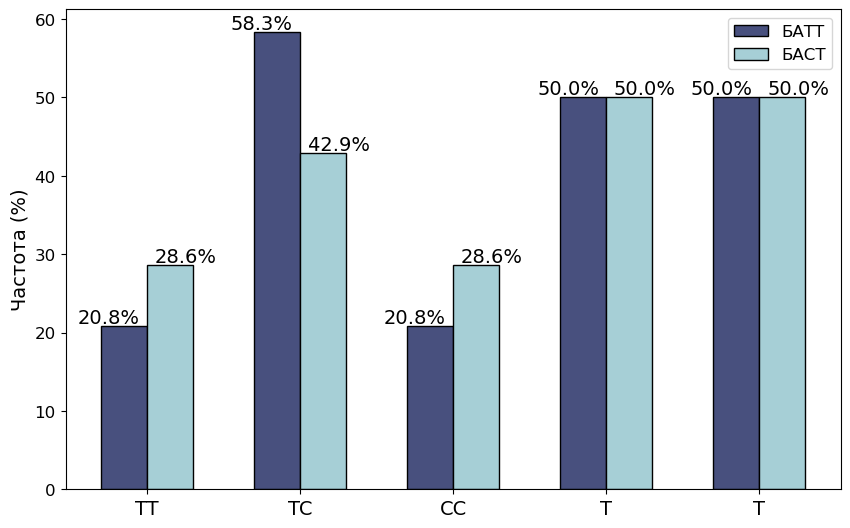

,БАТТ (абс.),БАТТ (%),БАСТ (абс.),БАСТ (%),χ2,p (χ2),p (fishe),FB,p (boschloo),OR,CI - 95%
TT,10,20.83,16,28.57,0.46,0.496,0.5,0.25,0.39298,0.66,0.27 - 1.63
TC,28,58.33,24,42.86,1.9,0.169,0.17,0.08,0.124725,1.87,0.86 - 4.08
CC,10,20.83,16,28.57,0.46,0.496,0.5,0.25,0.39298,0.66,0.27 - 1.63
Всего:,48,100.00,56,100.00,,,,,,,
T,48,50.00,56,50.00,0.0,1.0,1.0,0.56,1.0,1.0,0.58 - 1.73
C,48,50.00,56,50.00,0.0,1.0,1.0,0.56,1.0,1.0,0.58 - 1.73
Всего:,96,100.00,112,100.00,,,,,,,


SNP_rs2072100


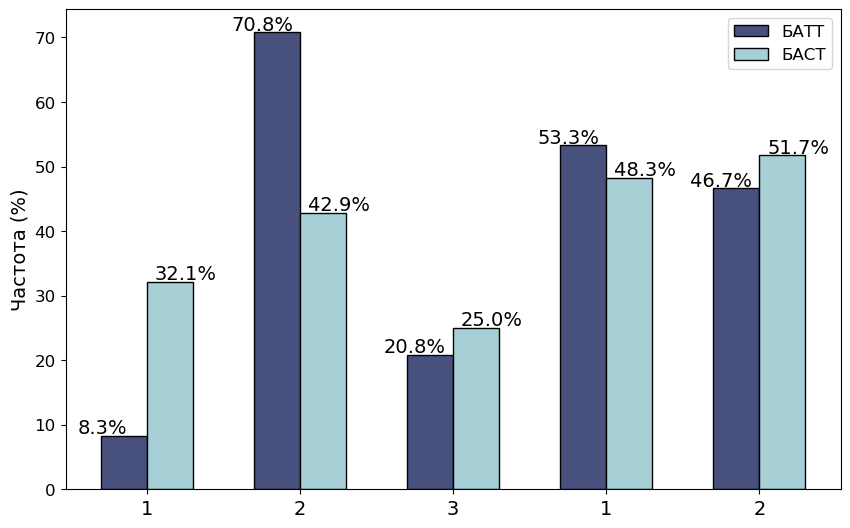

,БАТТ (абс.),БАТТ (%),БАСТ (абс.),БАСТ (%),χ2,p (χ2),p (fishe),FB,p (boschloo),OR,CI - 95%
1,4,8.330000,18,32.140000,7.42,0.006,0.0,0.0,0.00309,0.19,0.06 - 0.61
2,34,70.830000,24,42.860000,7.11,0.008,0.01,0.0,0.004322,3.24,1.43 - 7.33
3,10,20.830000,14,25.000000,0.07,0.788,0.65,0.4,0.647312,0.79,0.31 - 1.99
Всего:,48,100.000000,56,100.000000,,,,,,,
1,42,53.333333,60,48.275862,0.34,0.562,0.49,0.28,0.47773,1.22,0.28 - 0.85
2,54,46.666667,52,51.724138,0.34,0.562,0.49,0.28,0.47773,0.82,0.28 - 0.85
Всего:,90,100.000000,116,100.000000,,,,,,,


SNP_rs3771829


C:\Users\Денис\AppData\Local\Temp\ipykernel_11648\59422615.py:130: RuntimeWarning: invalid value encountered in double_scalars
  data_vr[2,9] = round((data_fisher[0,0] * data_fisher[1,1]) /
C:\Users\Денис\AppData\Local\Temp\ipykernel_11648\59422615.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
C:\Users\Денис\AppData\Local\Temp\ipykernel_11648\59422615.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)


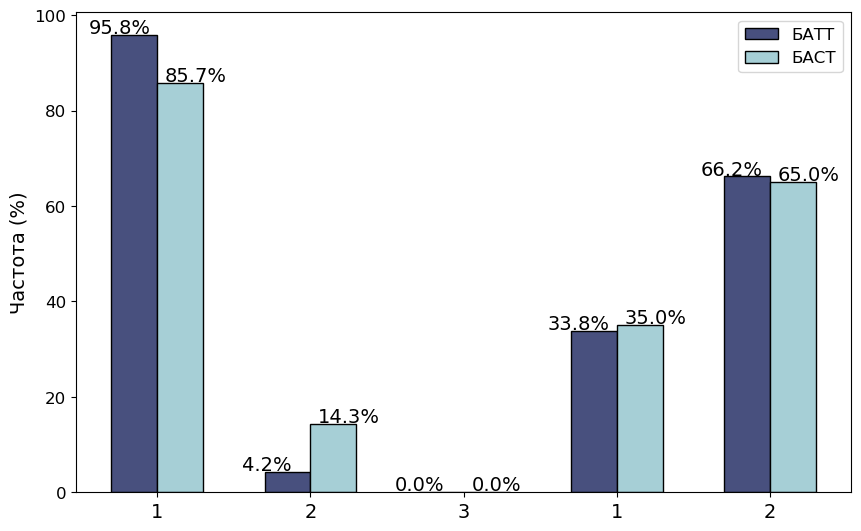

,БАТТ (абс.),БАТТ (%),БАСТ (абс.),БАСТ (%),χ2,p (χ2),p (fishe),FB,p (boschloo),OR,CI - 95%
1,46,95.830000,48,85.71,1.99,0.158,0.1,0.08,0.108295,3.83,0.77 - 19.0
2,2,4.170000,8,14.29,1.99,0.158,0.1,0.08,0.108295,0.26,0.05 - 1.29
3,0,0.000000,0,0.00,0.0,1.0,1.0,1.0,1.0,NaN,nan - nan
Всего:,48,100.000000,56,100.00,,,,,,,
1,94,33.802817,104,35.00,0.01,0.923,0.9,0.46,0.833781,0.95,0.56 - 1.45
2,2,66.197183,8,65.00,0.01,0.923,0.9,0.46,0.833781,1.05,0.56 - 1.45
Всего:,142,100.000000,160,100.00,,,,,,,


SNP_rs3823082


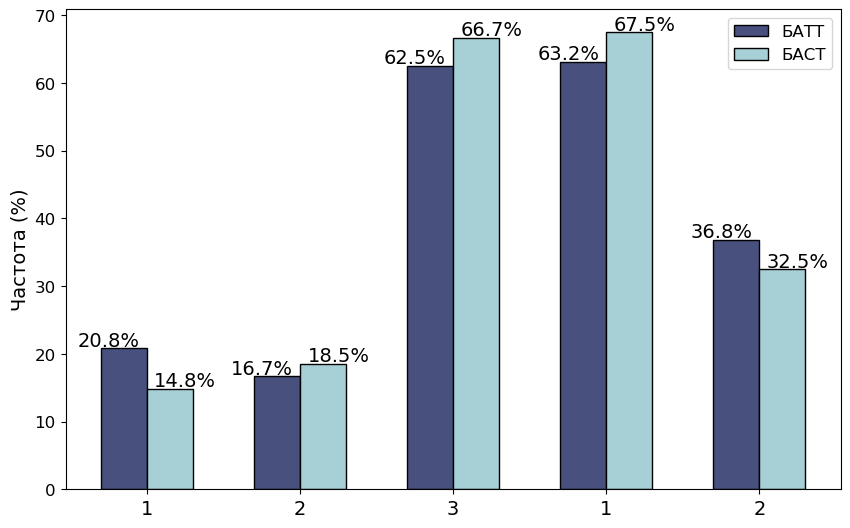

,БАТТ (абс.),БАТТ (%),БАСТ (абс.),БАСТ (%),χ2,p (χ2),p (fishe),FB,p (boschloo),OR,CI - 95%
1,10,20.830000,8,14.81,0.29,0.592,0.45,0.3,0.489431,1.51,0.54 - 4.21
2,8,16.670000,10,18.52,0.0,1.0,1.0,0.51,0.870072,0.88,0.32 - 2.45
3,30,62.500000,36,66.67,0.05,0.817,0.68,0.41,0.68389,0.83,0.37 - 1.87
Всего:,48,100.000000,54,100.00,,,,,,,
1,28,63.157895,26,67.50,0.16,0.688,0.62,0.34,0.605601,0.83,0.32 - 1.2
2,68,36.842105,82,32.50,0.16,0.688,0.62,0.34,0.605601,1.21,0.32 - 1.2
Всего:,76,100.000000,80,100.00,,,,,,,


In [328]:
for i in categorial:
    print(i)
    data_vr = test_fishera(data, i, name_group_all)
    print('===============================================================================')